In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

loc = '/Users/divyamkumar/Desktop/OCT-8/model.keras'
PATH = '/Users/divyamkumar/Desktop/OCT-8/forgit'
PATHog = '/Users/divyamkumar/Desktop/OCT-8/data'
IMG_HEIGHT = 400
IMG_WIDTH = 400

In [2]:
model = tf.keras.models.load_model(loc, compile=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [3]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
                    PATHog,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=20,
                    classes=['test'],
                    shuffle=False)
probabilities = model.predict(test_data_gen).flatten()

Found 200 images belonging to 1 classes.


2024-01-12 11:00:25.462188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-01-12 11:00:25.469784: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 3s 289ms/step


In [4]:
def check(probabilities):
  answers =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1
              ]

  correct = 0

  for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
      correct +=1

  percentage_identified = (correct / len(answers)) * 100


  print(f"Your model correctly identified {round(percentage_identified, 3)}% of the images of CNV and NORMAL OCTs.")
check(probabilities)
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% Normal")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% CNV")
    plt.show()

Your model correctly identified 94.898% of the images of CNV and NORMAL OCTs.


Found 8 images belonging to 1 classes.
2/2 [==============================] - 0s 54ms/step


2024-01-12 11:00:28.742683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


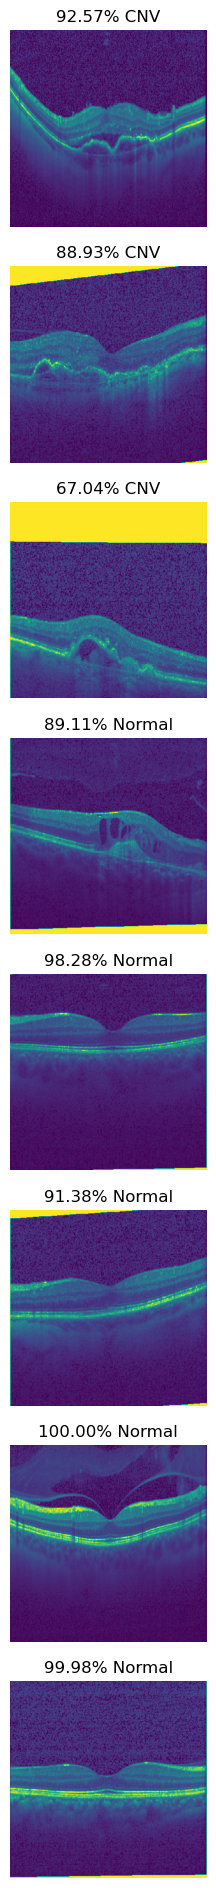

In [5]:
demo_image_generator = ImageDataGenerator(rescale=1./255)
demo_data_gen = demo_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    classes=['explainingdata'],
                    shuffle=False)

demo_images = [demo_data_gen[0][0][i] for i in range(4)] + [demo_data_gen[1][0][i] for i in range(4)]

probs = model.predict(demo_data_gen).flatten()

plotImages(demo_images, probs)

In [6]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

In [7]:
from tf_keras_vis.utils.scores import BinaryScore
score = BinaryScore(1) # or BinaryScore(True) 

from matplotlib import cm  #color map
from tf_keras_vis.gradcam import Gradcam #Gradcam

In [8]:
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

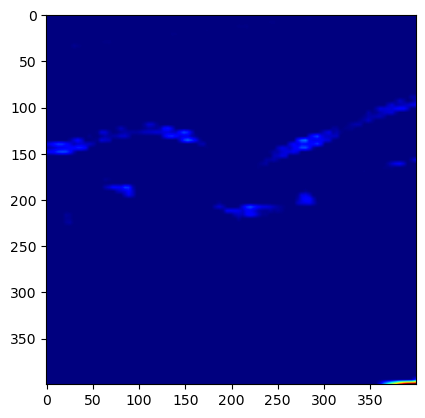

In [9]:
def create_heat(score, im_arr):
       cam = [gradcam(score, im_arr[0], penultimate_layer=-1), gradcam(score, im_arr[1], penultimate_layer=-1), 
              gradcam(score, im_arr[2], penultimate_layer=-1), gradcam(score, im_arr[3], penultimate_layer=-1),
              gradcam(score, im_arr[4], penultimate_layer=-1), gradcam(score, im_arr[5], penultimate_layer=-1),
              gradcam(score, im_arr[6], penultimate_layer=-1), gradcam(score, im_arr[7], penultimate_layer=-1)] 
       return cam
#creates gradcam heatmap using specified layer
cam = create_heat(score, demo_images)
plt.imshow(np.uint8(cm.jet(cam[1][0])[..., :3] * 255))
#Causes Kernel Crashes

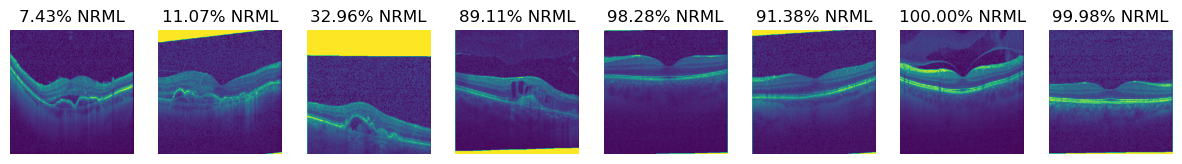

In [10]:
fig, axes = plt.subplots(1, 8, figsize=(15, 15))

for img, probability, ax in zip(demo_images, probs, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("%.2f" % ((probability)*100) + "% NRML")
plt.show()

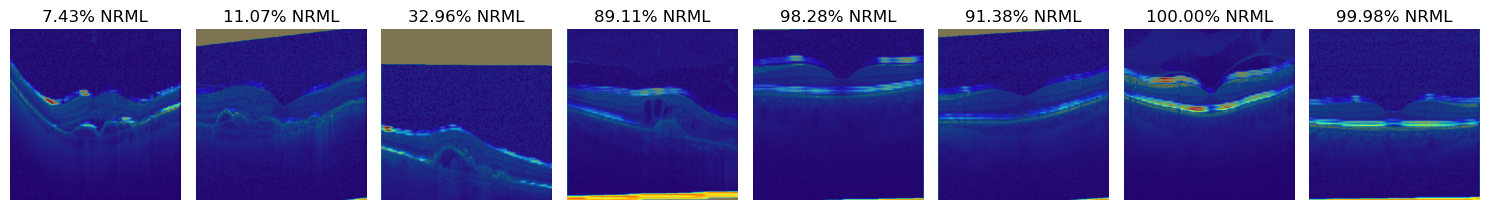

In [11]:
fig, axes = plt.subplots(1, 8, figsize=(15, 15))
count = 0
for img, ax in zip(demo_images, axes):
    heatmap = np.uint8(cm.jet(cam[count][0])[..., :3] * 255)
    ax.imshow(img)
    ax.imshow(heatmap, cmap='jet', alpha=0.5)
    ax.set_title("%.2f" % ((probs[count])*100) + "% NRML")
    ax.axis('off')
    count+=1
plt.tight_layout()
plt.show()